# Loan approval analysis

The aim of this project is to conduct exploratory analysis and run machine learning algorithms to create a classifier that decides whether to accept a loan application. In addition, determining the most important variables/features affecting the final decision.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.ioff()

In [2]:
df = pd.read_csv(r'C:\Analiza danych\Datasety\finance_loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset details:
Dataset contains some information about loans and their acceptance.

Variables description:
- **Loan_ID**: unique identification number,
- **Gender**: gender of applicant,
- **Married**: marriage status of applicant,
- **Dependents**: number of dependents of the applicant,
- **Education**: status of education
- **Self_Employed**: whether the applicant is self-employed,
- **ApplicantIncome**: income of the applicant,
- **CoapplicantIncome**: income of the coapplicant,
- **LoanAmount**: loan amount,
- **Loan_Amount_Term**: loan term in months,
- **Credit_History**: whether the applicant has a credit history,
- **Property_Area**: whether the property is located in urban or rural area,
- **Loan_Status**: whether the application has been approved.



In [4]:
print(f'Dataset size: {df.shape}')
df.info()

Dataset size: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.describe(include = ['O']).T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The number of missing values is different for each variable, so we will use imputation.

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')

In [10]:
df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = \
    imputer.fit_transform(df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [11]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    object 
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 62.5+ KB


In [13]:
df['LoanAmount'] = df['LoanAmount'].astype(float)
df[['Loan_Amount_Term', 'Credit_History']] = df[['Loan_Amount_Term', 'Credit_History']].astype(int)

# EDA

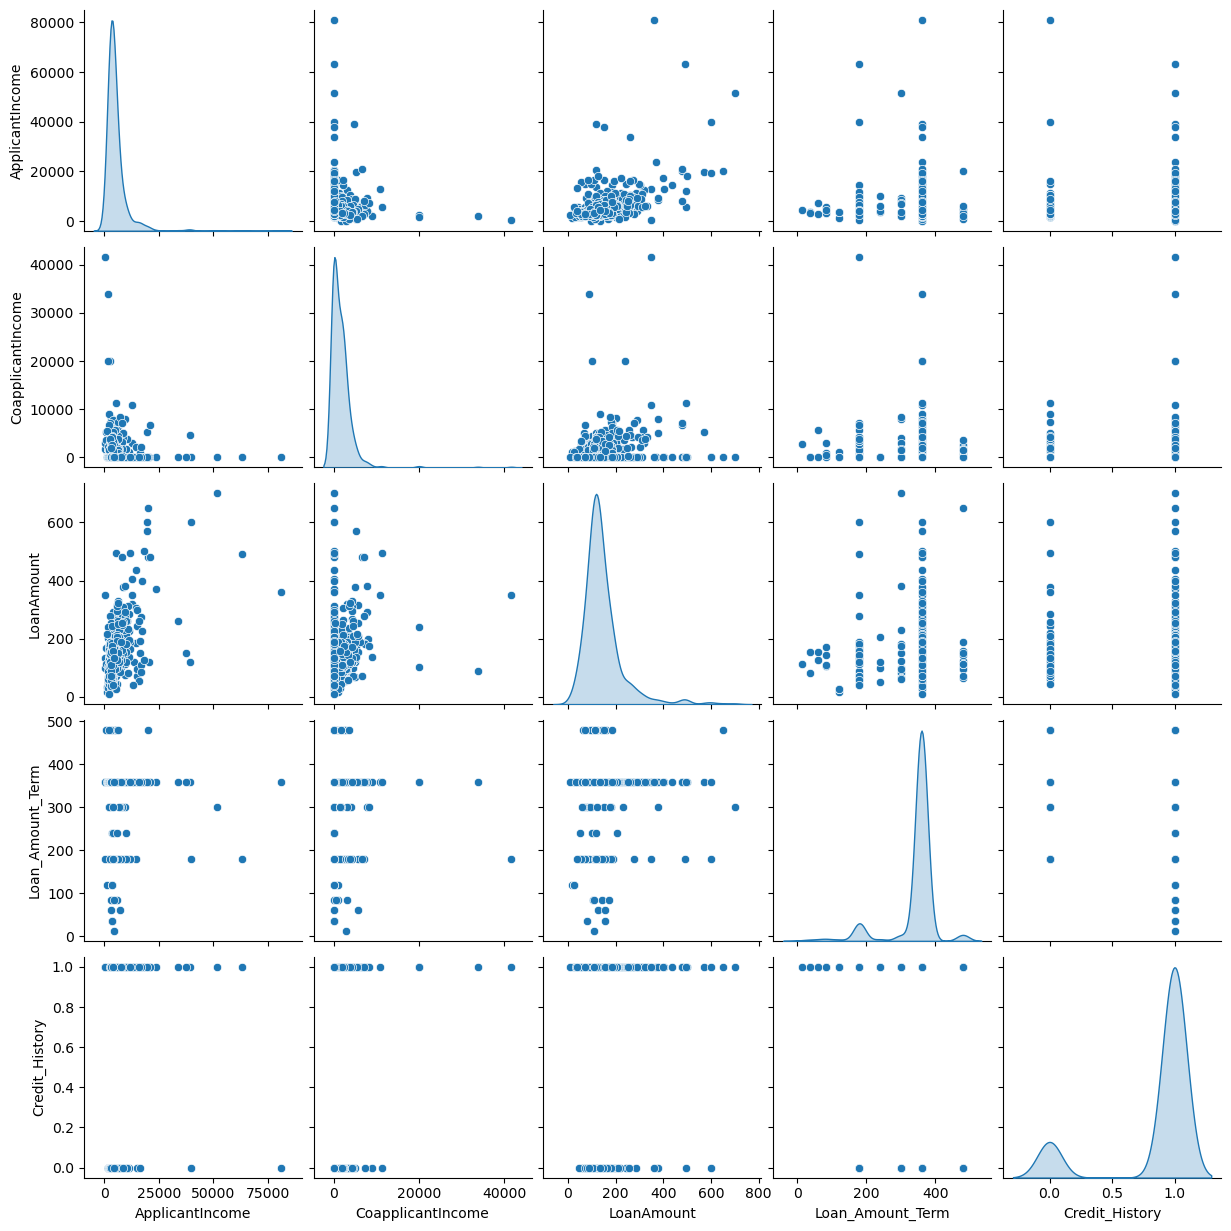

In [14]:
sns.pairplot(data = df, diag_kind = 'kde')

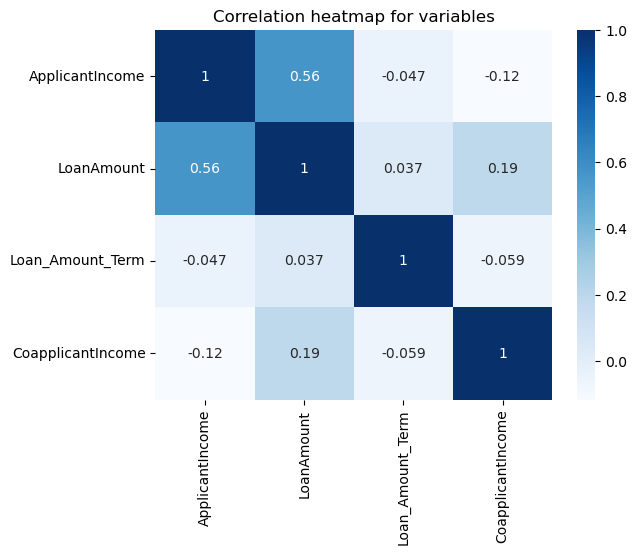

In [15]:
sns.heatmap(df[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncome']].corr(), annot = True, cmap = 'Blues')
plt.title('Correlation heatmap for variables')
plt.show()

LoanAmount and ApplicationIncome are slightly correlated.

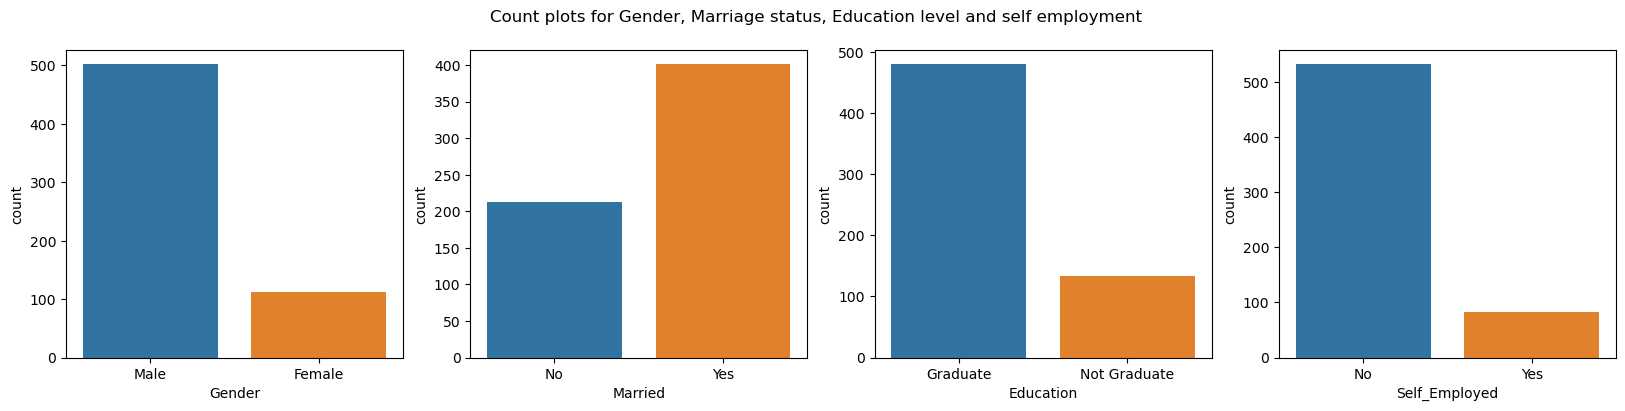

In [16]:
fig, axes = plt.subplots(1, 4, figsize = (20, 4))
fig.suptitle('Count plots for Gender, Marriage status, Education level and self employment')

sns.countplot(ax = axes[0], x = df['Gender'])
sns.countplot(ax = axes[1], x = df['Married'])
sns.countplot(ax = axes[2], x = df['Education'])
sns.countplot(ax = axes[3], x = df['Self_Employed'])

plt.show()

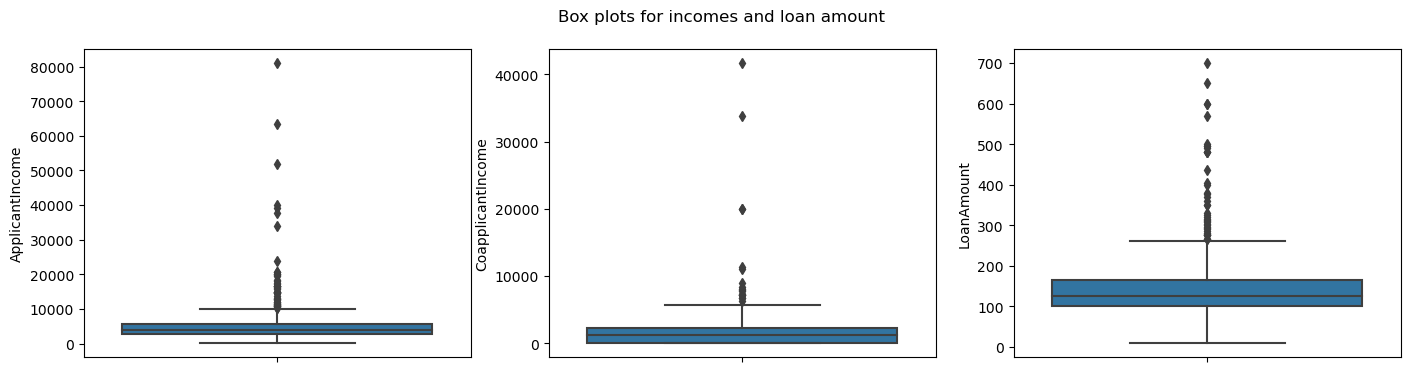

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (17, 4))
fig.suptitle('Box plots for incomes and loan amount')

sns.boxplot(ax = axes[0], y = df['ApplicantIncome'])
sns.boxplot(ax = axes[1], y = df['CoapplicantIncome'])
sns.boxplot(ax = axes[2], y = df['LoanAmount'])

plt.show()

In [18]:
iqr = np.quantile(df['ApplicantIncome'], 0.75) - np.quantile(df['ApplicantIncome'], 0.25)

In [19]:
upper = np.quantile(df['ApplicantIncome'], 0.75) + 1.5 * iqr

In [20]:
df[df['ApplicantIncome'] > upper].shape

(50, 13)

As you can see in the charts, there are a lot of values beyond IQR and they could be considered outliers. But then we would lose a lot of valuable data for the model and people's earnings are often in large ranges.

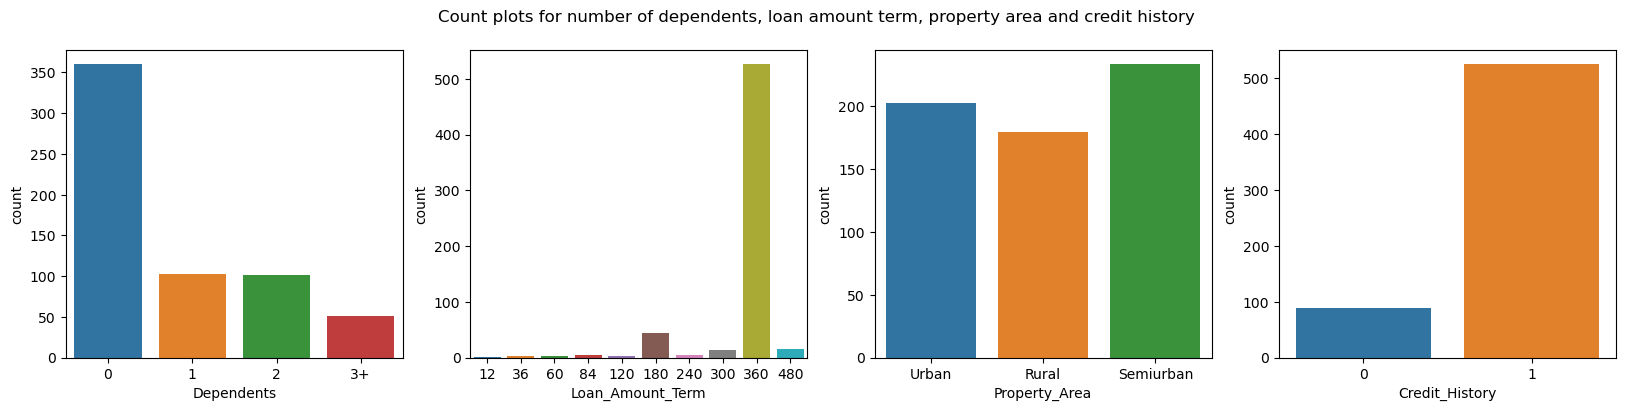

In [22]:
fig, axes = plt.subplots(1, 4, figsize = (20, 4))
fig.suptitle('Count plots for number of dependents, loan amount term, property area and credit history')

sns.countplot(ax = axes[0], x = df['Dependents'])
sns.countplot(ax = axes[1], x = df['Loan_Amount_Term'])
sns.countplot(ax = axes[2], x = df['Property_Area'])
sns.countplot(ax = axes[3], x = df['Credit_History'])

plt.show()

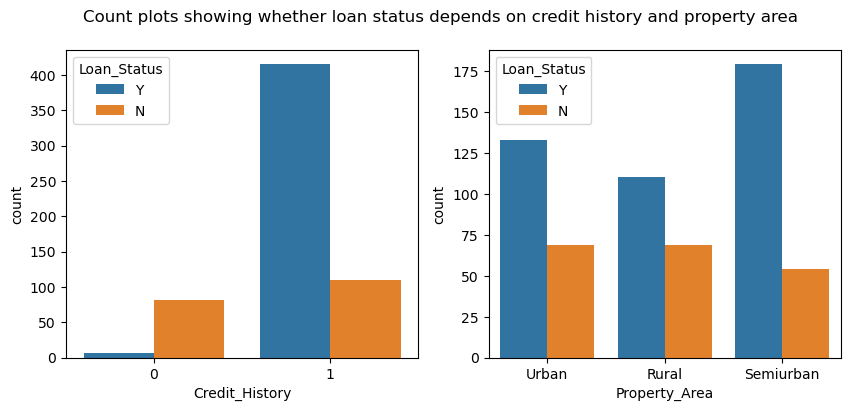

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
plt.suptitle('Count plots showing whether loan status depends on credit history and property area')

sns.countplot(ax = axes[0], x = df['Credit_History'], hue = df['Loan_Status'])
sns.countplot(ax = axes[1], x = df['Property_Area'], hue = df['Loan_Status'])

plt.show()

In [24]:
df.groupby('Loan_Status')[['ApplicantIncome', 'CoapplicantIncome',
                           'LoanAmount', 'Loan_Amount_Term']].agg([np.mean, np.std, np.median])

ApplicantIncome                      CoapplicantIncome  \
                       mean          std  median              mean   
Loan_Status                                                          
N               5446.078125  6819.558528  3833.5       1877.807292   
Y               5384.068720  5765.441615  3812.5       1504.516398   

                                  LoanAmount                    \
                     std  median        mean        std median   
Loan_Status                                                      
N            4384.060103   268.0  149.432292  83.670481  126.5   
Y            1924.754855  1239.5  143.661137  84.449405  125.0   

            Loan_Amount_Term                    
                        mean        std median  
Loan_Status                                     
N                  344.56250  68.199402  360.0  
Y                  341.43128  62.697242  360.0

In [25]:
df.groupby('Gender')[['ApplicantIncome', 'CoapplicantIncome',
                           'LoanAmount', 'Loan_Amount_Term']].agg([np.mean, np.std, np.median])

ApplicantIncome                      CoapplicantIncome               \
                  mean          std  median              mean          std   
Gender                                                                       
Female     4643.473214  3585.381488  3583.0       1108.008929  4094.595514   
Male       5573.017928  6531.266299  3862.0       1735.752829  2586.622042   

                LoanAmount                   Loan_Amount_Term             \
        median        mean        std median             mean        std   
Gender                                                                     
Female     0.0  126.517857  78.215224  114.0       352.500000  55.964274   
Male    1438.5  149.693227  84.953278  128.0       340.159363  66.009666   

               
       median  
Gender         
Female  360.0  
Male    360.0

In [26]:
df.groupby('Dependents')[['ApplicantIncome', 'CoapplicantIncome',
                           'LoanAmount', 'Loan_Amount_Term']].agg([np.mean, np.std, np.median])

ApplicantIncome                       CoapplicantIncome  \
                      mean           std  median              mean   
Dependents                                                           
0              4928.680556   4958.125734  3622.5       1600.880889   
1              5962.274510   5587.399149  4051.5       1426.235294   
2              4926.782178   3153.828577  4006.0       1687.245544   
3+             8581.215686  13603.938611  4691.0       2024.313725   

                                 LoanAmount                     \
                    std  median        mean         std median   
Dependents                                                       
0           2593.120209  1293.5  135.041667   73.421900  120.0   
1           1830.043127  1219.5  157.107843   93.499289  136.0   
2           2556.268525  1387.0  149.326733   70.394760  132.0   
3+          6050.789044     0.0  188.117647  132.888923  130.0   

           Loan_Amount_Term                    
                       mean        std median  
Dependents                                     
0                348.800000  57.721877  360.0  
1                329.647059  75.133893  360.0  
2                340.871287  64.914970  360.0  
3+               325.882353  78.922151  360.0